# PCA

Build a 3D dataset

In [116]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
plt.co

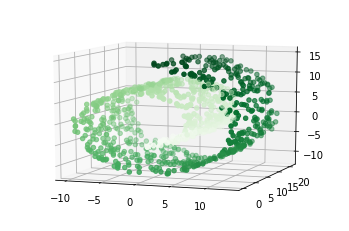

In [140]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)

#### Using sci-kit learn


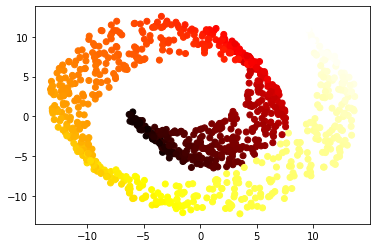

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
plt.scatter(X2D[:,0], X2D[:, 1], c=t, cmap=plt.cm.hot)

In [119]:
pca.components_

array([[ 0.56791312,  0.15670748,  0.80803308],
       [-0.77712377, -0.2213858 ,  0.5891239 ]])

In [120]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 ])

It means 84 precent of datas lies down around first axis and 14 precent of datas are in second axis.

In [121]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

1

We can also set this precentage in PCA class it self.

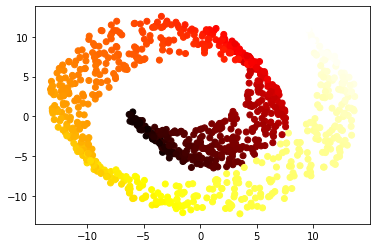

In [122]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

In [123]:
X_reduced.shape

(1000, 3)

## Incrimental PCA

This method of PCA use to not get all inputs into ram, and use a batch method to have a faster selecting.


In [124]:
from sklearn.decomposition import IncrementalPCA
n_batches = 10 
inc_pca = IncrementalPCA(n_components = 2)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

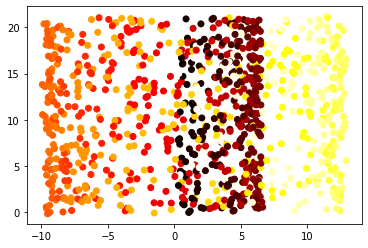

In [125]:
inc_pca.transform(X).shape
plt.scatter(X[:,0], X[:, 1], c=t, cmap=plt.cm.hot)

## Randomized PCA

Time complexity of this algorithm is $O(m \times d^2) + O(d^3)$ instead of $O(m \times n^3) + O(n^3)$

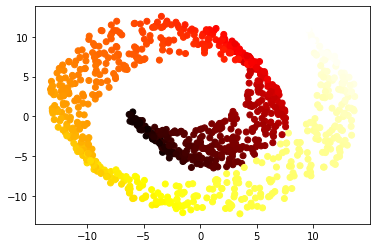

In [126]:
rnd_pca = PCA(n_components=2, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

## Kernel PCA


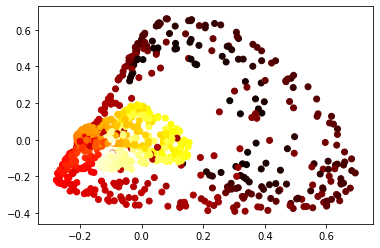

In [127]:
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = kernel_pca.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

## Locally Linear Embeding (LLE)

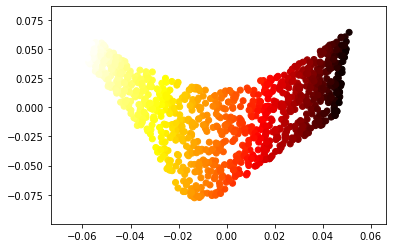

In [128]:
from sklearn.manifold import LocallyLinearEmbedding
lle_pca = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle_pca.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

## Other PCAs
* Multidimensional Scaling (MDS) : trying to preserve the distance between the instances
* Isomap : creates a graph by connecting each instance to nearest
* t-Distributed Stochastic Neighbor Embedding (t-SNE) : trying to keep similar instances close and disimillar instances apart.

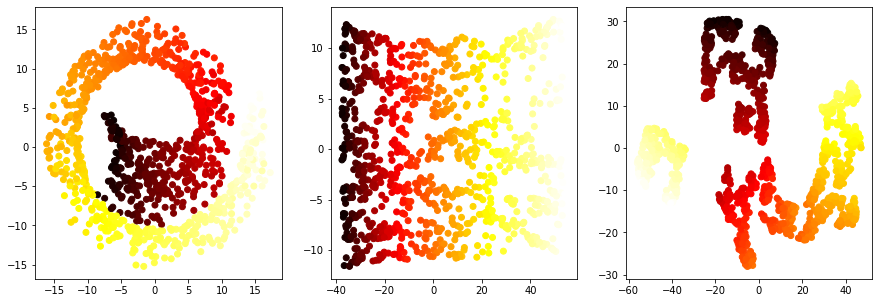

In [137]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
mds_pca = MDS(n_components=2)
isomap_pca = Isomap(n_components=2, n_neighbors=10)
t_sne_pca = TSNE(n_components=2)
X_mds = mds_pca.fit_transform(X)
X_iso = isomap_pca.fit_transform(X)
X_sne = t_sne_pca.fit_transform(X)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_mds[:,0], X_mds[:, 1], c=t, cmap=plt.cm.hot)
plt.subplot(132)
plt.scatter(X_iso[:,0], X_iso[:, 1], c=t, cmap=plt.cm.hot)
plt.subplot(133)
plt.scatter(X_sne[:,0], X_sne[:, 1], c=t, cmap=plt.cm.hot)